# CSE 572: Lab 2

This lab contains a Data Exploration module and a practice exercise in which you will use some of the operations from the Data Exploration module.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button.

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit on Canvas the following:
1)

1.   a link to your Colab notebook,
2.   the .ipynb file, and
3.   a pdf of the executed notebook.

To generate a pdf of the notebook, click File > Print > Save as PDF.
Sometimes if you print too many values, the PDF would not contain the results later. **It is your responsibility to make sure the PDF containing all the results you have.**


# **PUT YOUR GROUP INFO HERE**

| Group number | August Group XXX |            |
|--------------|------------------|------------|
| Member 1     | Dhyan Patel      |  dpate337  |
| Member 2     | Animesh Chaudhary|  achaud81  |
| Member 3     | Satwik Reddy Lattupally| slattupa   |
| Member 4     |                  |            |

# Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook.

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis techniques to be used.
2. To make use of humans’ abilities to recognize patterns in the data.

## 1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. In this tutorial, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica)

In this tutorial, you will learn how to:

- Load a CSV data file into a Pandas DataFrame object.

- Compute various summary statistics from the DataFrame.

**1.** First, you need to download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository.

**<font color='red'>Code:</font>** The following code uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the first five rows of the data frame.

In [ ]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


How big is this dataset? Print the number of samples/records and attributes.

In [ ]:
print('There are {} samples and {} attributes in this dataset.'.format(data.shape[0], data.shape[1]))

There are 150 samples and 5 attributes in this dataset.


**2.** For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

**<font color="red">Code:</font>**

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [ ]:
data['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

**<font color="red">Code:</font>**

In [ ]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red">Code:</font>**

In [ ]:
numeric_data = data.drop(columns=['class'])

# Compute covariance matrix
print('Covariance:')
numeric_data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
print('Correlation:')
numeric_data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


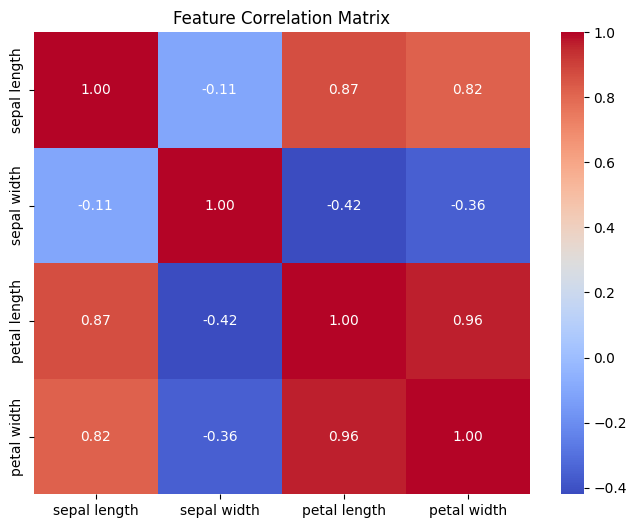

The two features with the strongest correlation are: 1.0


<ipython-input-12-b60070f1a4f7>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strongest_pair = strongest_corr[1]  # First non-diagonal highest correlation


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Find the strongest correlation
strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_pair = strongest_corr[1]  # First non-diagonal highest correlation

print(f"The two features with the strongest correlation are: {strongest_pair}")


**Question 1: Which two features have the strongest correlation? (ignore the diagonals, which show each feature's correlation with itself)**


**Answer:**
Based on the above results, we can say that **petal width** and **petal length** have the strongest correlation.

## 2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1.

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

<Axes: >

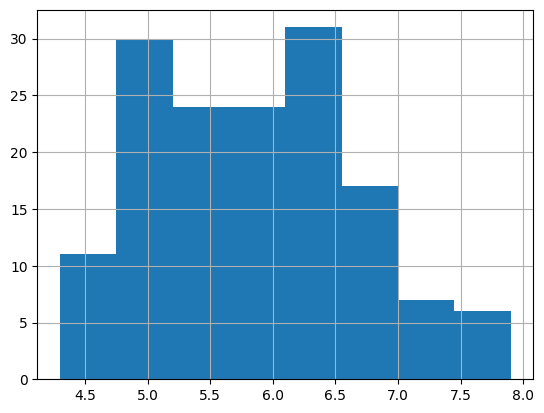

In [ ]:
%matplotlib inline

data['sepal length'].hist(bins=8)

Plot a histogram of each of the features in a single plot.

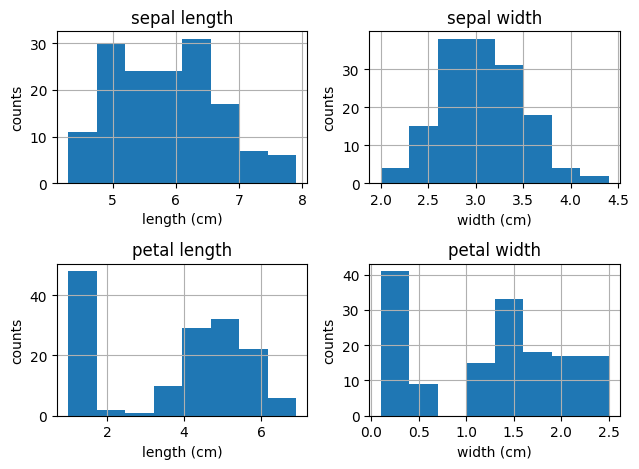

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(data.columns[:4]):
    data[col].hist(bins=8, ax=axes.flat[i])
    axes.flat[i].set_title(col)
    if 'length' in col:
        axes.flat[i].set_xlabel('length (cm)')
    elif 'width' in col:
        axes.flat[i].set_xlabel('width (cm)')
    axes.flat[i].set_ylabel('counts')

fig.tight_layout()

**Question 2: What do these histograms tells us about the distribution of the values of each feature in our dataset? Are they uniformly distributed, Gaussian-distributed, or other? Do they appear to have one mode, or multiple? Describe the distribution of each of the features.**

**Note: You do not need to quantitatively compute the distribution or do a statistical test for this question. Just describe its appearance.**

**Answer:**
Based on the above figures, we can say that:
- Sepal length & Sepal width: Appear to have a Gaussian-like distribution with a single peak.
- Petal length & Petal width: Seem to be multi-modal which indicates different species distributions.

**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

<Axes: >

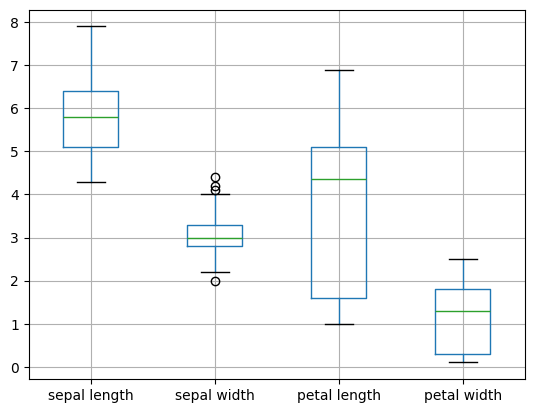

In [ ]:
data.boxplot()

**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

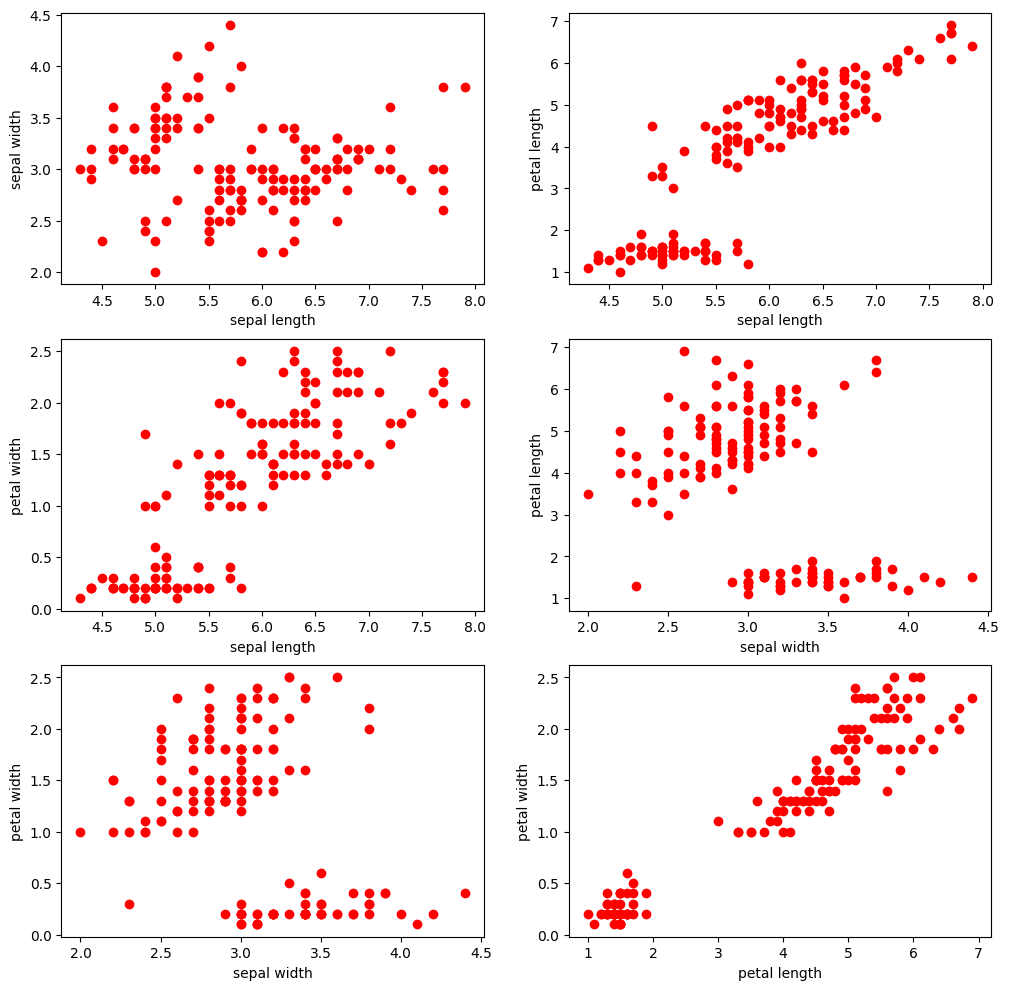

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** If we color the scatter plot points by the class value for each sample, we can see if the classes are clustered in any of the attribute pairs.

**<font color="red">Code:</font>**

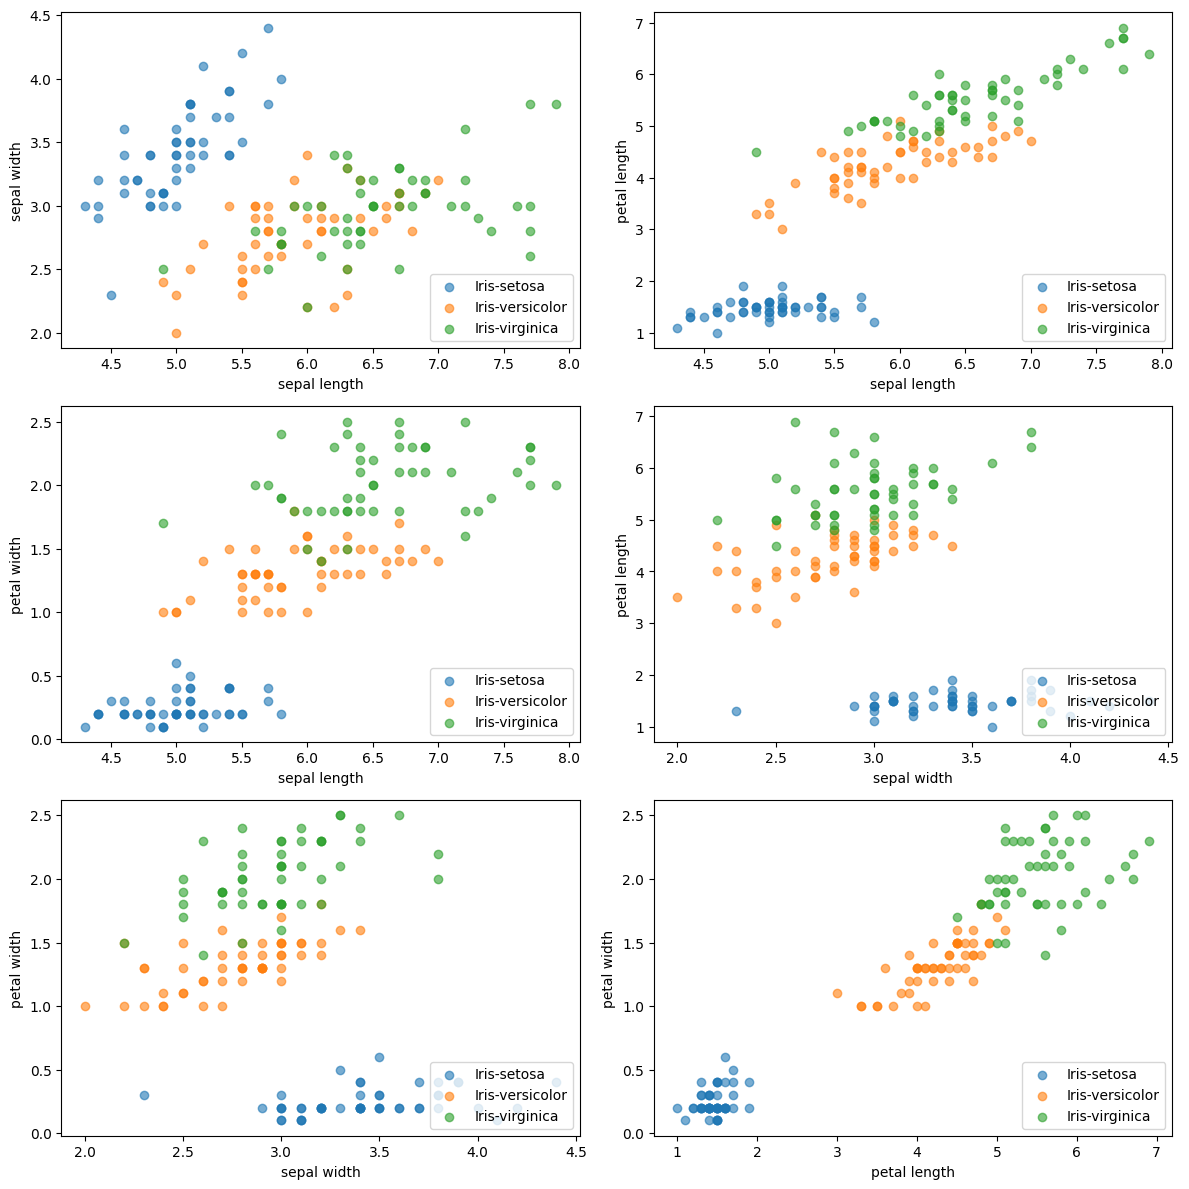

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        for iris in data['class'].unique():
            axes[ax1][ax2].scatter(data[data['class'] == iris][data.columns[i]],
                                   data[data['class'] == iris][data.columns[j]],
                                   label=iris,
                                   alpha=0.6)
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        axes[ax1][ax2].legend(loc='lower right')
        index = index + 1

fig.tight_layout()

**5.** To see which features are the best and weakest predictors of the iris class, we can visualize the feature value and class value as a scatter plot.

**<font color="red">Code:</font>**

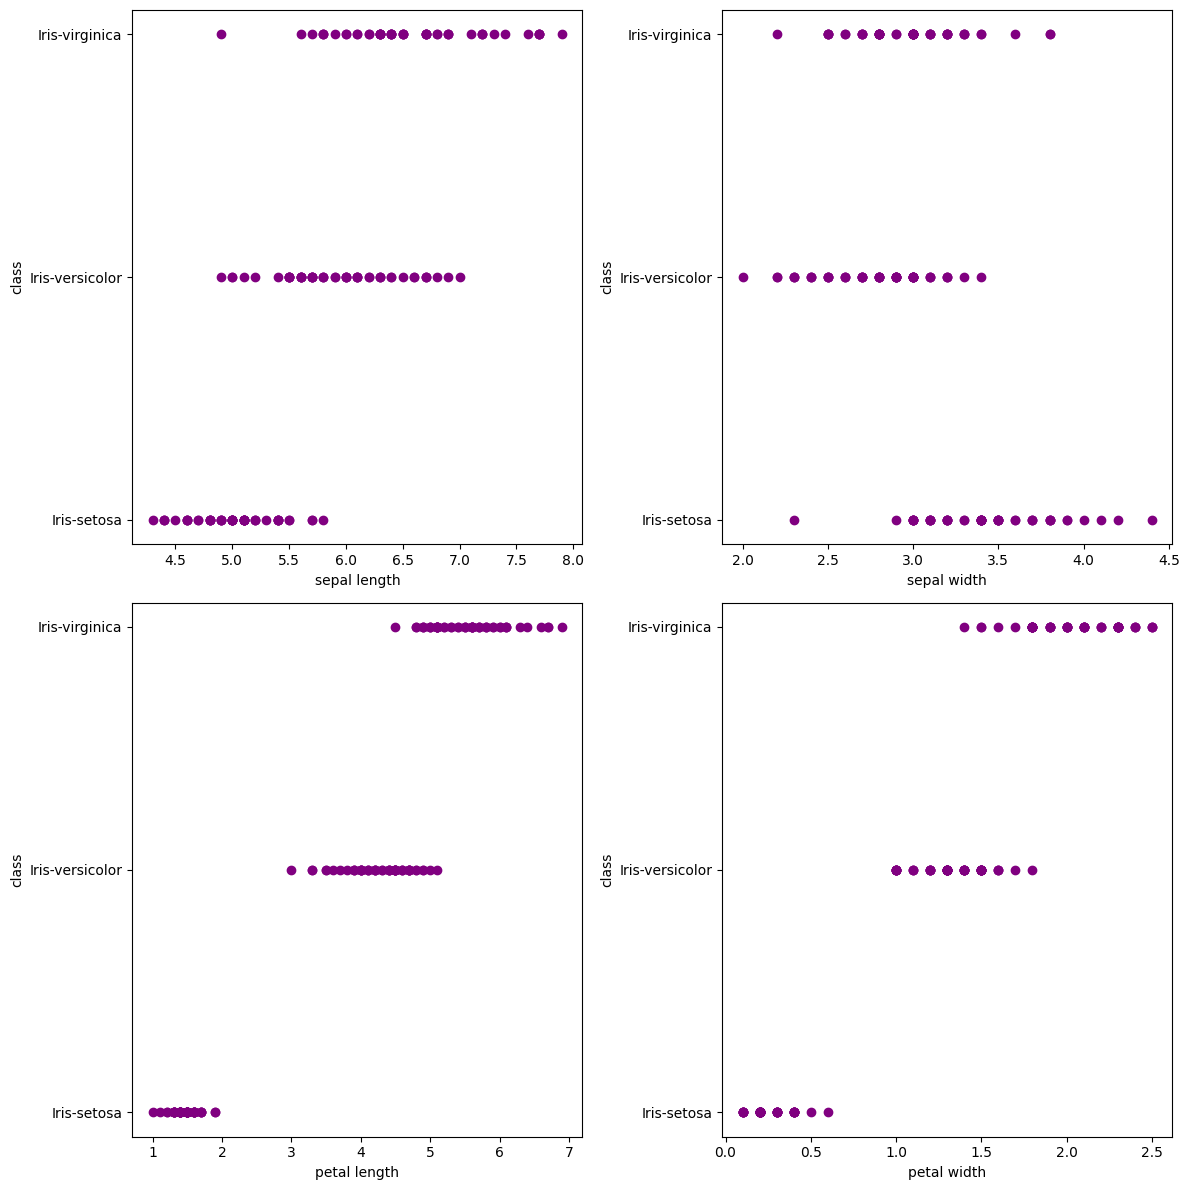

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
index = 0
for col_name in data.columns[:-1]:
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[col_name], data['class'], color='purple')
        axes[ax1][ax2].set_xlabel(col_name)
        axes[ax1][ax2].set_ylabel('class')
        index = index + 1
fig.tight_layout()

**Question 3: Study these plots and review your responses to Questions 1 and 2. Which features are the best predictors of the iris class? The weakest predictors? Which combination of two features separates the classes best?**

**Answer:**

Based on the above plots:
- Best predictors: Petal length and petal width show clear separation among the three iris classes.
- Weakest predictor: Sepal width shows considerable overlap among the classes.
- Best feature combination: Petal length vs. Petal width gives the best separation of classe

**4.** Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

**<font color="red">Code:</font>**

<Axes: >

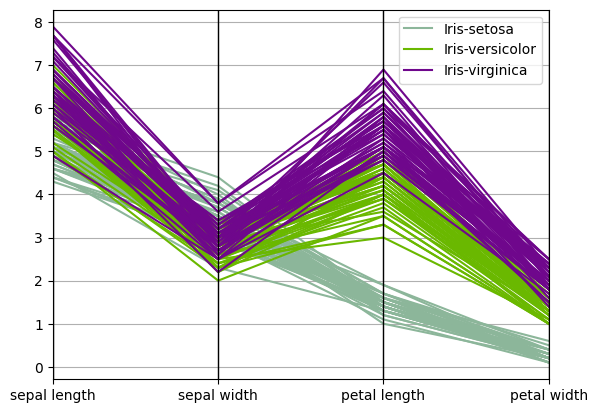

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

**Question 4: Which of the classes are more similar to each other in terms of their attribute distributions (i.e., their lines overlap most)? If you had to come up with a set of rules for distinguishing between iris-setosa, iris-versicolor, and iris-virginica based on their attribute values, what are some rules you might propose?**

**Answer:**

Similarity Between Classes:

- Iris-Versicolor and Iris-Virginica are more similar to each other in terms of petal length and petal width distributions.
- Iris-Setosa is distinctly separate from the other two classes, especially in petal length and petal width.

Rules for Classifying Iris Species:

- Iris-Setosa: Has shortest petal length (< 2.0 cm) and smallest petal width (< 0.6 cm). These two attributes alone can classify it with near 100% accuracy.
- Iris-Versicolor vs. Iris-Virginica: Petal length: Versicolor (around 3-5 cm), Virginica (> 5 cm). Petal width: Virginica has a larger range (> 1.5 cm).

Sepal width is not a strong distinguishing factor as it overlaps significantly across all three classes.

## 4. Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using Pandas read_csv() function and display its first 5 data points.

**<font color="red">Code:</font>**

**Question 5: View the documentation for the Wisconsin Breast Cancer dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29). Who collected this dataset? When did they collect it?**

**Answer:**

The Wisconsin Breast Cancer dataset was collected by Dr. W. H. Wolberg from the University of Wisconsin-Madison. It was gathered in 1992 using fine needle aspiration (FNA) biopsy samples to diagnose breast cancer.


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Print the value counts for the Class attribute.

In [ ]:
# YOUR CODE HERE
print("Class Distribution:")
print(data['Class'].value_counts())

Class Distribution:
Class
2    458
4    241
Name: count, dtype: int64


**Question 6: What does a Class value of 2 indicate? What does 4 indicate?**

**Answer:**
In the Wisconsin Breast Cancer dataset, the Class attribute represents the diagnosis of the tumor:

- A Class value of 2 indicates a benign (non-cancerous) tumor.
- A Class value of 4 indicates a malignant (cancerous) tumor.

These values were assigned based on fine needle aspiration (FNA) biopsy results, where malignant tumors exhibit more irregular and variable cell structures compared to benign tumors.

### 4.1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

**<font color="red">Code:</font>**

In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

**<font color="red">Code:</font>**

In [ ]:
data2 = data['Bare Nuclei']
data2 = pd.to_numeric(data2, errors='coerce')
print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 4.1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

**<font color="red">Code:</font>**

<Axes: >

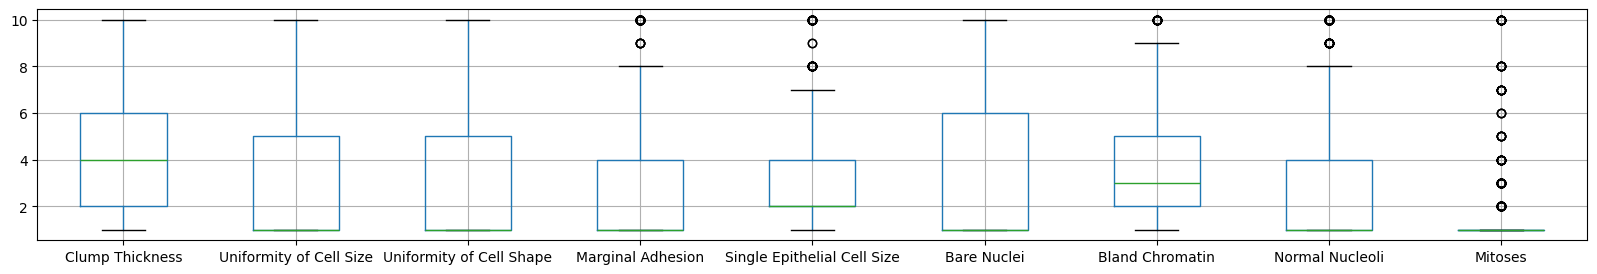

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

**<font color="red">Code:</font>**

The following code shows the results of standardizing the columns of the data. To standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation. This results in standard scores that represent the number of standard deviations above or below the mean that a specific observation falls. For instance, a standardized value of 2 indicates that the observation falls 2 standard deviations above the mean.

Note that missing values (NaN) are not affected by the standardization process.

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**<font color="red">Code:</font>**

The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outliers = 632


### 4.1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues.

**<font color="red">Code:</font>**

In the following example, we first check for duplicate instances in the breast cancer dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
28,2,1,1,1,2,1,2,1,1,2
35,2,1,1,1,2,1,2,1,1,2
48,4,1,1,3,2,1,3,1,1,2
64,1,1,1,1,2,1,2,1,1,2
66,4,1,1,1,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table:

In [ ]:
dups

,0
0,False
1,False
2,False
3,False
4,False
...,...
694,False
695,True
696,False
697,False


Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


Now, combine all of these pre-processing steps to clean the dataset by 1) dropping the rows that have NaN values, 2) dropping the duplicate rows, and then 3) removing outliers with Z score Z > 3 or Z <= -3.

In [ ]:
# YOUR CODE HERE
from scipy.stats import zscore

data = data.dropna()
print(f'Number of rows after dropping NaN values: {data.shape[0]}')

# Step 2: Drop duplicate rows
data = data.drop_duplicates()
print(f'Number of rows after dropping duplicates: {data.shape[0]}')

# Step 3: Remove outliers using Z-score method (Z > 3 or Z < -3)
numeric_cols = data.select_dtypes(include=['number']).columns
# Compute the Z-scores after filtering out non-numeric columns
z_scores = np.abs(zscore(data[numeric_cols]))  # Compute absolute Z-score

# Keep only rows where all Z-scores are within the range (-3, 3)
data_cleaned = data[(z_scores < 3).all(axis=1)]
print(f'Number of rows after removing outliers: {data_cleaned.shape[0]}')

# Display first few rows of cleaned dataset
data_cleaned.head()

Number of rows after dropping NaN values: 449
Number of rows after dropping duplicates: 449
Number of rows after removing outliers: 435


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Question 7: How many rows/samples are left after applying all three steps?**

**Answer:**

Total 435 rows are left after applying all three steps.